In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv('Algerian_forest_fires_dataset_cleaned1.csv')

In [5]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,18
1,1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,13
2,2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,22
3,3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,13
4,4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,16


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,18
1,1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,13
2,2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,22
3,3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,13
4,4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,16


In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,WS
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,18
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,13
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,22
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,13
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,16


In [11]:
df.drop(['WS'],axis=1,inplace=True)

In [12]:
X = df.drop(['FWI'],axis=1)
Y= df['FWI']

In [13]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

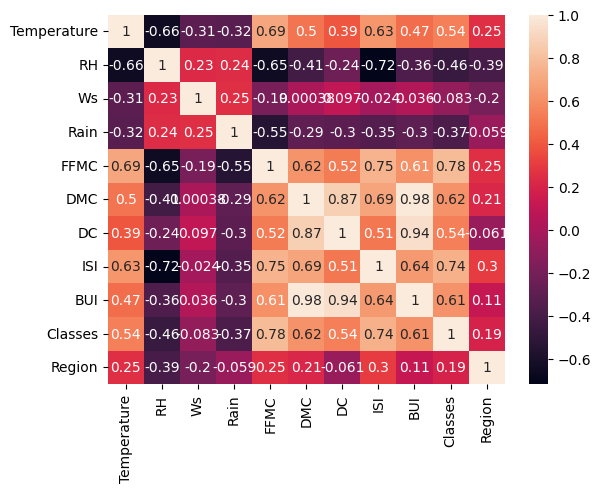

In [17]:
plt.Figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(X_train,0.85)

In [20]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [21]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled=  Scaler.fit_transform(X_train)
X_test_scaled =  Scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)

Mean Absolute Error 0.5468236465249978
R2 score 0.9847657384266951


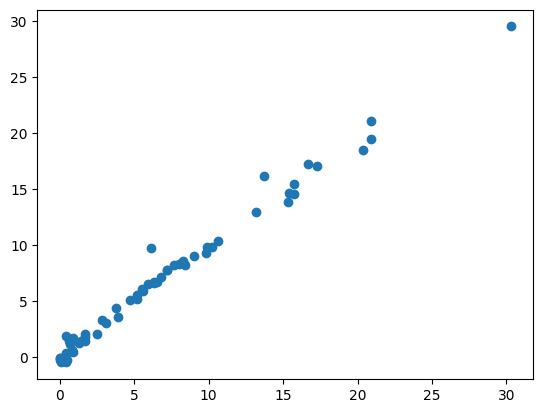

In [24]:
plt.scatter(Y_test,y_pred)

## Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)

Mean Absolute Error 1.133175994914409
R2 score 0.9492020263112388


## Ridge Regression


In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)

Mean Absolute Error 0.5642305340105715
R2 score 0.9842993364555512


## Elasticnet Regression

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,Y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)

Mean Absolute Error 1.8822353634896005
R2 score 0.8753460589519703


In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridge = RidgeCV(cv =5)
ridge.fit(X_train_scaled,Y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)

Mean Absolute Error 0.5642305340105715
R2 score 0.9842993364555512


In [29]:
#picling the model
Scaler

,copy,True
,with_mean,True
,with_std,True


In [30]:
ridge

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [31]:
import pickle
pickle.dump(Scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))
